In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')


In [3]:
df = pd.read_csv("AAPL.csv")


In [5]:
df.shape

(2011, 7)

In [6]:
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [9]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [10]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [11]:
# Drop rows with missing or invalid dates
df = df.dropna(subset=['Date'])

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df = df.dropna()

In [14]:
df.shape

(796, 7)

In [15]:
df.isnull().sum().sum()

np.int64(0)

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,796,2015-12-27 11:40:06.030150912,2012-01-02 00:00:00,2013-12-29 06:00:00,2015-12-22 00:00:00,2018-01-02 06:00:00,2019-12-12 00:00:00,NaN
Open,796.0,126.132924,57.527142,85.676429,112.025002,166.102501,270.0,50.191742
High,796.0,127.283482,58.895714,86.193214,112.915001,168.652496,272.559998,50.699702
Low,796.0,124.969162,57.317142,84.875359,110.239998,164.545002,268.5,49.827337
Close,796.0,126.216739,58.459999,85.611784,111.979999,166.732495,271.459991,50.39079
Adj Close,796.0,118.96284,50.765709,75.543108,104.28788,161.366161,269.600067,52.212275
Volume,796.0,57878770.728643,11362000.0,27980725.0,43883350.0,72731600.0,294303100.0,41511069.830274


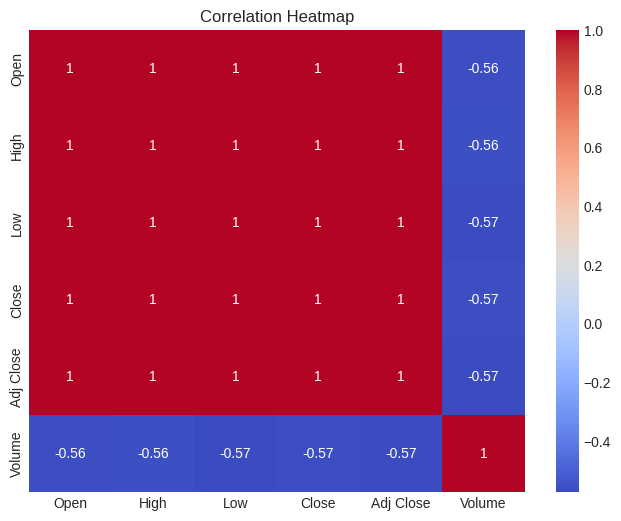

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

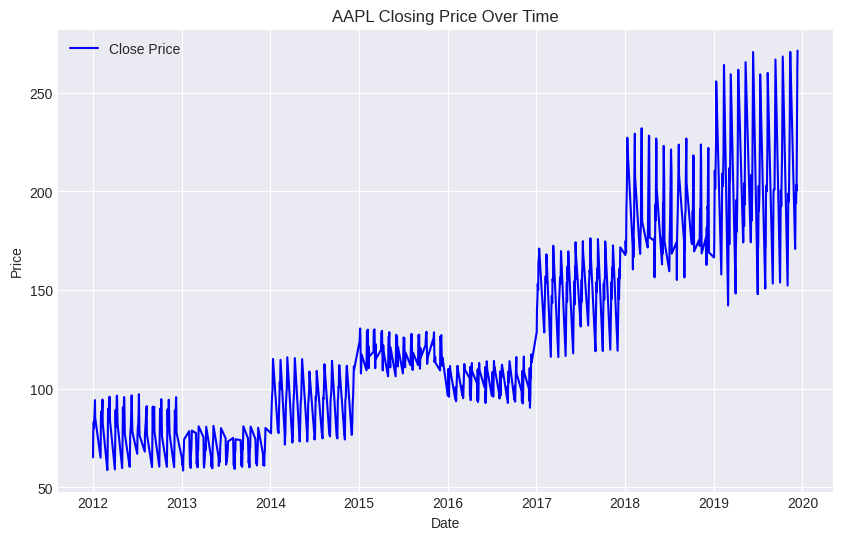

In [18]:
if 'Close' in df.columns:
    df = df.sort_values('Date')
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.title('AAPL Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

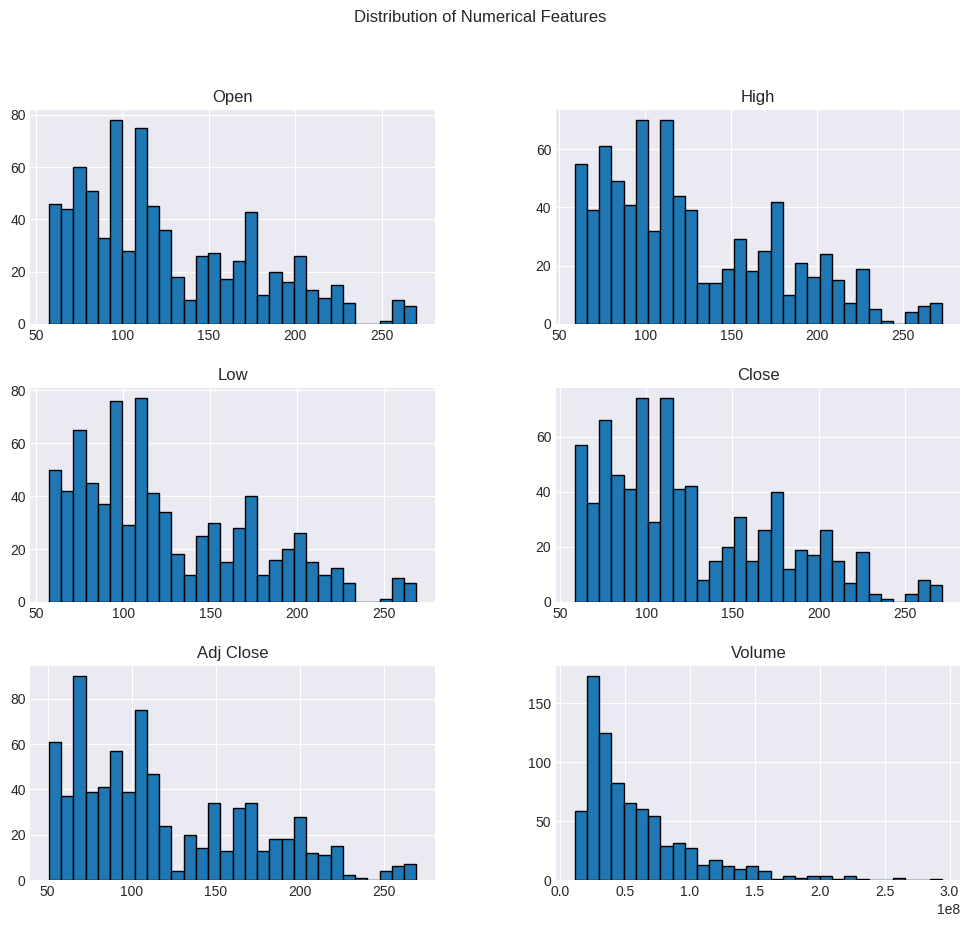

In [19]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [20]:
if 'Close' in df.columns:
    df['MA20'] = df['Close'].rolling(20).mean()
    df['MA50'] = df['Close'].rolling(50).mean()

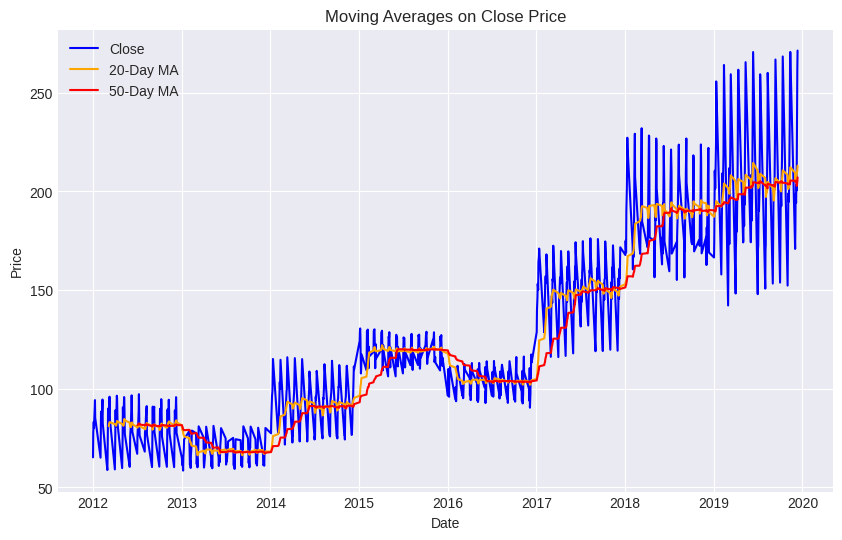

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.plot(df['Date'], df['MA20'], label='20-Day MA', color='orange')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='red')
plt.title('Moving Averages on Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

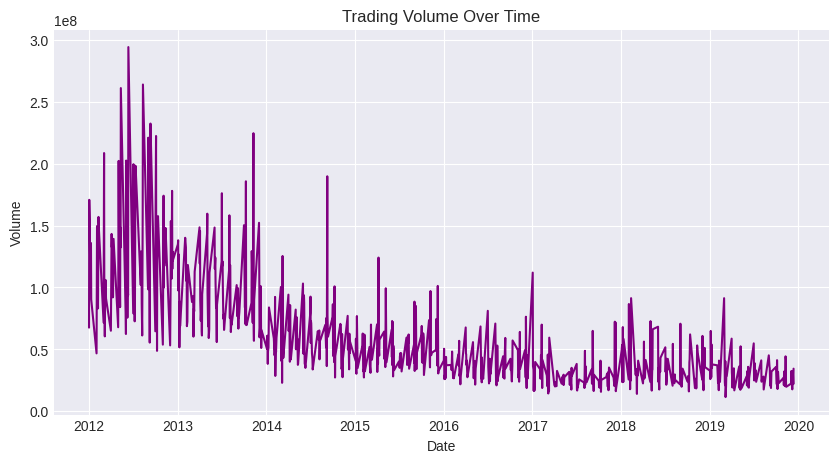

In [23]:
if 'Volume' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x='Date', y='Volume', color='purple')
    plt.title('Trading Volume Over Time')
    plt.show()

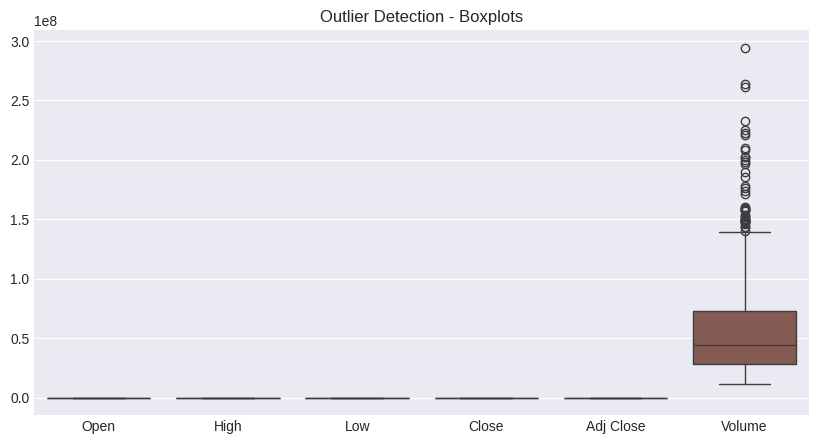

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[num_cols])
plt.title("Outlier Detection - Boxplots")
plt.show()